In [5]:
from datahandler import DataHandler
from trader import Products

In [19]:
products = [Products.VOLCANIC_ROCK, Products.VOLCANIC_ROCK_VOUCHER_9500, Products.VOLCANIC_ROCK_VOUCHER_9750, Products.VOLCANIC_ROCK_VOUCHER_10000, Products.VOLCANIC_ROCK_VOUCHER_10250, Products.VOLCANIC_ROCK_VOUCHER_10500]

In [ ]:
dh = DataHandler("/home/zr/code/imc-prosperity-3/.venv/lib/python3.12/site-packages/prosperity3bt/resources/round3")
dh.load_csv_files()
df = dh.get_combined_dataframes()
print(df.head())


data = {product: df[df['product'] == product] for product in products}

   day  timestamp                      product  bid_price_1  bid_volume_1  \
0    0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0          19.0   
1    0          0                      DJEMBES      13493.0          72.0   
2    0          0                   CROISSANTS       4321.0         111.0   
3    0          0                         JAMS       6631.0         210.0   
4    0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0          19.0   

   bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          NaN           NaN          NaN           NaN          100   
1          NaN           NaN          NaN           NaN        13494   
2          NaN           NaN          NaN           NaN         4322   
3          NaN           NaN          NaN           NaN         6633   
4          NaN           NaN          NaN           NaN          506   

   ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0            19          NaN   

In [8]:
assert len(data) == len(products)

In [9]:
data[Products.VOLCANIC_ROCK]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,index
13,0,0,VOLCANIC_ROCK,10502.0,205.0,NaN,NaN,NaN,NaN,10504,146,10505.0,59.0,NaN,NaN,10503.0,0.0,2000000
21,0,100,VOLCANIC_ROCK,10509.0,192.0,NaN,NaN,NaN,NaN,10511,122,10512.0,70.0,NaN,NaN,10510.0,0.0,2000100
31,0,200,VOLCANIC_ROCK,10512.0,167.0,NaN,NaN,NaN,NaN,10514,109,10515.0,58.0,NaN,NaN,10513.0,0.0,2000200
55,0,300,VOLCANIC_ROCK,10517.0,118.0,10516.0,68.0,NaN,NaN,10518,118,10519.0,68.0,NaN,NaN,10517.5,0.0,2000300
60,0,400,VOLCANIC_ROCK,10509.0,128.0,10508.0,73.0,NaN,NaN,10510,128,10511.0,73.0,NaN,NaN,10509.5,0.0,2000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839936,2,999500,VOLCANIC_ROCK,10167.0,110.0,10166.0,51.0,NaN,NaN,10169,156,NaN,NaN,NaN,NaN,10168.0,0.0,4999500
839945,2,999600,VOLCANIC_ROCK,10166.0,161.0,NaN,NaN,NaN,NaN,10168,101,10169.0,60.0,NaN,NaN,10167.0,0.0,4999600
839965,2,999700,VOLCANIC_ROCK,10166.0,143.0,10165.0,51.0,NaN,NaN,10168,194,NaN,NaN,NaN,NaN,10167.0,0.0,4999700
839984,2,999800,VOLCANIC_ROCK,10167.0,119.0,10166.0,57.0,NaN,NaN,10168,119,10169.0,57.0,NaN,NaN,10167.5,0.0,4999800


Let's have a look at the daa visually

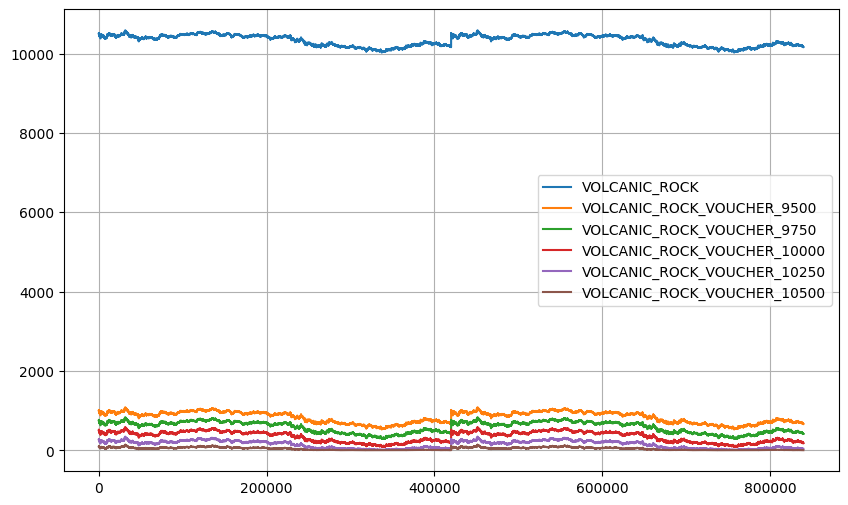

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in products:
    ax1.plot(data[product]["mid_price"], label=product)
    
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()


Let's remove the underlying and look at the options

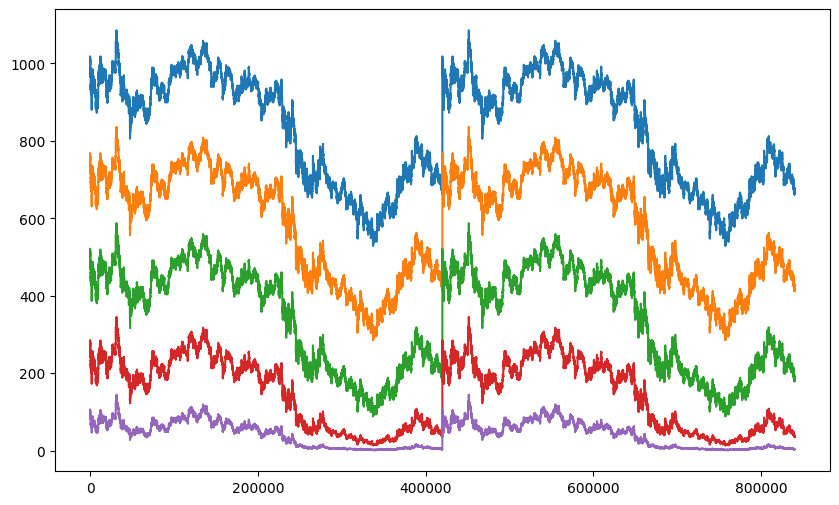

In [22]:
import matplotlib.pyplot as plt

options = [product for product in products if product != Products.VOLCANIC_ROCK]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in options:
    ax1.plot(data[product]["mid_price"], label=product)

They all looks the same just sort of translated up or down a little

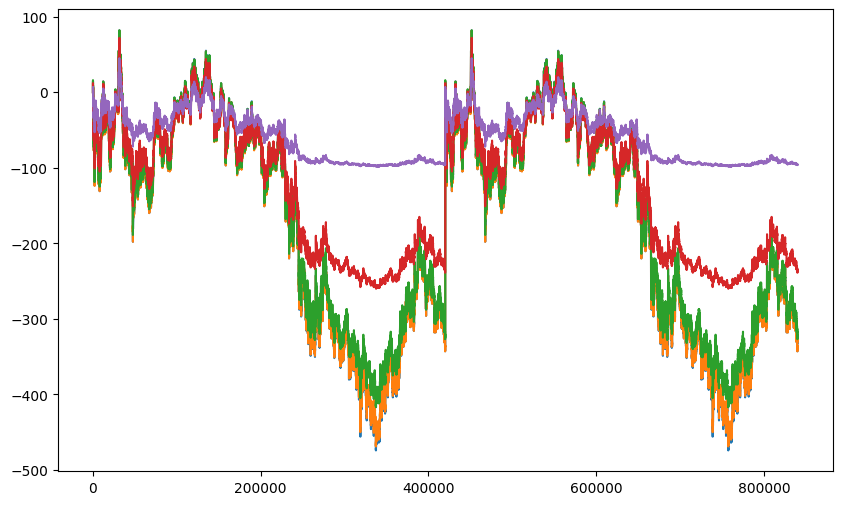

In [25]:
import matplotlib.pyplot as plt

options = [product for product in products if product != Products.VOLCANIC_ROCK]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in options:
    product_data = data[product]
    d = product_data["mid_price"] - product_data["mid_price"].iloc[0]
    ax1.plot(d , label=product)

Overlapping the different options you can see that they all still look the same but they all look like they're scaled vertically

# Calculate volatility of underlying

In [ ]:
underlying_data = data[Products.VOLCANIC_ROCK]

underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(1)
underlying_data[["mid_price", "mid_price_lag_1"]]

/tmp/ipykernel_32386/1197654754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(-1)


,mid_price,mid_price_lag_1
13,10503.0,10510.0
21,10510.0,10513.0
31,10513.0,10517.5
55,10517.5,10509.5
60,10509.5,10506.0
...,...,...
839936,10168.0,10167.0
839945,10167.0,10167.0
839965,10167.0,10167.5
839984,10167.5,10166.5


underlying_data["interday_returns"]= underlying_data["mid_price_lag_1"] - underlying_data["mid_price"].shift(-1)